In [1]:
#Downloading the Mudata
!wget -O inference_mudata.h5mu "https://dl.dropboxusercontent.com/scl/fi/u3hyg4gq9pfttpf6amlv5/inference_mudata.h5mu?rlkey=fa908coboty72rgqsg2bcndfu&st=985x9zhh&dl=1"


--2024-09-26 14:12:38--  https://dl.dropboxusercontent.com/scl/fi/u3hyg4gq9pfttpf6amlv5/inference_mudata.h5mu?rlkey=fa908coboty72rgqsg2bcndfu&st=985x9zhh&dl=1
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:601b:15::a27d:80f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.3.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 514435121 (491M) [text/plain]
Saving to: ‘inference_mudata.h5mu’

inference_mudata.h5 100%[===================>] 490.60M  85.4MB/s    in 6.0s    

2024-09-26 14:12:46 (81.7 MB/s) - ‘inference_mudata.h5mu’ saved [514435121/514435121]



In [2]:
%pip install muon==0.1.6
%pip install seaborn==0.13.2
%pip install mudata==0.3.1


  Using cached muon-0.1.6-py3-none-any.whl.metadata (7.2 kB)
  Using cached numpy-2.1.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached matplotlib-3.9.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.11.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached anndata-0.10.9-py3-none-any.whl.metadata (6.9 kB)
  Using cached scanpy-1.10.3-py3-none-any.whl.metadata (9.4 kB)
  Using cached scikit_learn-1.5.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached umap_learn-0.5.6-py3-none-any.whl.metadata (21 kB)
  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached protobuf-5.28.2-cp38-abi3-many

In [1]:
import muon as md
import pandas as pd
import seaborn as sns


/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
crispr_mu = md.read_h5mu('inference_mudata.h5mu')

/opt/conda/lib/python3.11/site-packages/mudata/_core/mudata.py:1531: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("var", axis=0, join_common=join_common)
/opt/conda/lib/python3.11/site-packages/mudata/_core/mudata.py:1429: FutureWarning: From 0.4 .update() will not pull obs/var columns from individual modalities by default anymore. Set mudata.set_options(pull_on_update=False) to adopt the new behaviour, which will become the default. Use new pull_obs/pull_var and push_obs/push_var methods for more flexibility.
  self._update_attr("obs", axis=1, join_common=join_common)


In [3]:
# mudata is just anndata stored at same place with possibility of sync
#Lets visualize the main fields
#    -guide
#    -hashing
#    -gene

crispr_mu

MuData object with n_obs × n_vars = 32471 × 25184
  obs:	'cov1', 'batch'
  uns:	'pairs_to_test', 'test_results'
  3 modalities
    gene:	32471 x 24731
      obs:	'batch', 'cov1', 'batch_number', 'n_counts', 'log1p_n_genes_by_counts', 'total_gene_umis', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'percent_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'num_expressed_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
      var:	'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'gene_chr', 'gene_start', 'gene_end'
    guide:	32471 x 441
      obs:	'batch', 'cov1', 'num_expressed_guides', 'batch_number', 'total_guide_umis'
      var:	'guide_id', 'sgRNA_ID', 'sgRNA_sequences', 'Target_name', 'chr', 'start', 'end', 'Set', 'intended_target_name', 'intended_target_chr', 'intended_target_start', 'intended_target_end', 'sequence', 'targeting'
      uns:	'capture_method', 'moi'
      layers:	'guide_assignment'
    hashing:	32471 x 12
      obs:	'batch', 'cov1', 'cluster_id', 'hto_type', 'hto_type_split'

In [4]:
#Showing a specific modality
crispr_mu['hashing']

AnnData object with n_obs × n_vars = 32471 × 12
    obs: 'batch', 'cov1', 'cluster_id', 'hto_type', 'hto_type_split'

In [5]:
#this command will show the scRNA count matrix
crispr_mu['hashing'].X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 250238 stored elements and shape (32471, 12)>

In [6]:
#Lets transform it in a pandas dataframe
crispr_mu['hashing'].to_df()

gene_id,HTO1,HTO2,HTO3,HTO4,HTO5,HTO6,HTO7,HTO8,HTO9,HTO10,HTO11,HTO12
barcode,,,,,,,,,,,,
CAGTAACCACTCTGTC_0,1.0,3.0,0.0,4.0,2.0,5.0,2.0,51.0,4.0,0.0,1.0,0.0
CCTCTGACATCTATGG_0,0.0,2.0,4.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,26.0,0.0
TATCTCAAGTTAACGA_0,5.0,2.0,29.0,12.0,15766.0,2.0,43.0,0.0,97.0,281.0,0.0,0.0
CTTACCGTCAGTGTTG_0,0.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,19.0,0.0
ACCCACTGTGGCAAAC_0,0.0,0.0,0.0,15.0,0.0,3.0,1.0,3.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
CATATTCTCTGATTCT_0,0.0,1.0,1.0,23.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,4.0
GGCGTGTTCTTACCGC_0,2.0,24.0,30.0,1.0,1.0,0.0,4.0,7.0,2.0,1.0,25.0,1.0
GAGCAGACACATGACT_0,0.0,4.0,1.0,2.0,0.0,5.0,209.0,1.0,1.0,1.0,1.0,2.0


<Axes: xlabel='gene_id'>

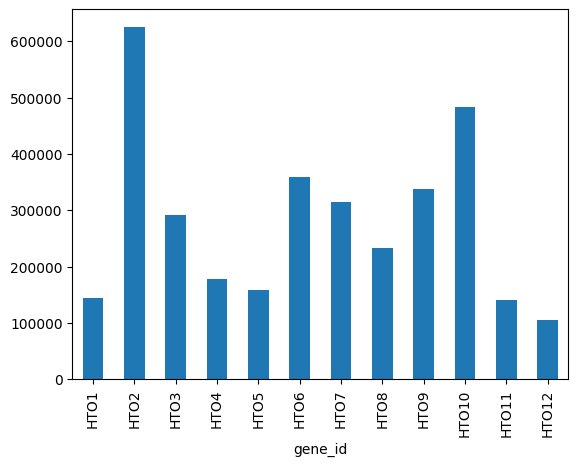

In [7]:
#lets visualize the total counts of hto across the different cells
crispr_mu['hashing'].to_df().sum(0).plot.bar()

In [8]:
#Lets visualize the hto metadata per cell
crispr_mu['hashing'].obs

,batch,cov1,cluster_id,hto_type,hto_type_split
barcode,,,,,
CAGTAACCACTCTGTC_0,batch_a,lane1,8,HTO8,HTO8
CCTCTGACATCTATGG_0,batch_a,lane1,11,HTO11,HTO11
TATCTCAAGTTAACGA_0,batch_a,lane1,2781,HTO1-HTO3-HTO4-HTO5-HTO7-HTO9-HTO10,multiplets
CTTACCGTCAGTGTTG_0,batch_a,lane1,11,HTO11,HTO11
ACCCACTGTGGCAAAC_0,batch_a,lane1,4,HTO4,HTO4
...,...,...,...,...,...
CATATTCTCTGATTCT_0,batch_a,lane1,50,HTO4-HTO12,multiplets
GGCGTGTTCTTACCGC_0,batch_a,lane1,141,HTO2-HTO3-HTO11,multiplets
GAGCAGACACATGACT_0,batch_a,lane1,7,HTO7,HTO7


/tmp/ipykernel_503/1689117835.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crispr_mu['hashing'].obs.groupby('hto_type_split').count()['hto_type'].plot.bar()


<Axes: xlabel='hto_type_split'>

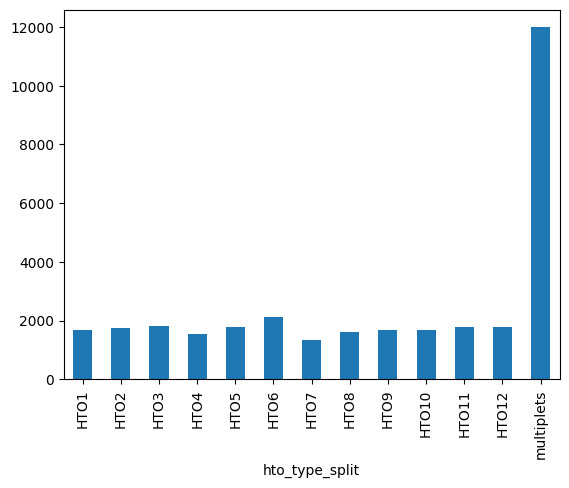

In [9]:
#Lets visualize the hto metadata per cell
crispr_mu['hashing'].obs.groupby('hto_type_split').count()['hto_type'].plot.bar()

In [10]:
#lets filter out cell with multiplets
no_multiplets_index = crispr_mu['hashing'].obs.query('hto_type_split != "multiplets" ').index.values


In [11]:
crispr_mu[ no_multiplets_index,   : ]   #no_multiplets_index rows with the given index , : = all the columns


View of MuData object with n_obs × n_vars = 20479 × 25184
  obs:	'cov1', 'batch'
  uns:	'pairs_to_test', 'test_results'
  3 modalities
    gene:	20479 x 24731
      obs:	'batch', 'cov1', 'batch_number', 'n_counts', 'log1p_n_genes_by_counts', 'total_gene_umis', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'percent_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'num_expressed_genes', 'doublet_scores', 'predicted_doublets', 'doublet_info'
      var:	'symbol', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'gene_chr', 'gene_start', 'gene_end'
    guide:	20479 x 441
      obs:	'batch', 'cov1', 'num_expressed_guides', 'batch_number', 'total_guide_umis'
      var:	'guide_id', 'sgRNA_ID', 'sgRNA_sequences', 'Target_name', 'chr', 'start', 'end', 'Set', 'intended_target_name', 'intended_target_chr', 'intended_target_start', 'intended_target_end', 'sequence', 'targeting'
      uns:	'capture_method', 'moi'
      layers:	'guide_assignment'
    hashing:	20479 x 12
      obs:	'batch', 'cov1', 'cluster_id', 'hto_type', 'hto_type_split'

In [12]:
crispr_mu[ no_multiplets_index,   : ]['hashing'].to_df().sum(0)

gene_id
HTO1      70808.0
HTO2     278262.0
HTO3     138185.0
HTO4      71829.0
HTO5      70587.0
HTO6     178692.0
HTO7     126911.0
HTO8     122475.0
HTO9     154618.0
HTO10    138005.0
HTO11     52410.0
HTO12     50898.0
dtype: float64

<Axes: xlabel='gene_id'>

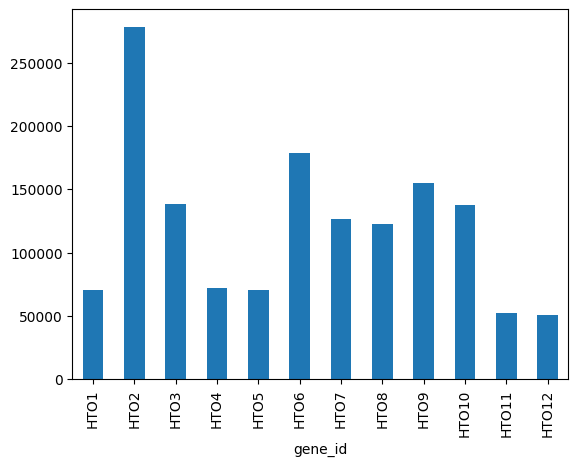

In [13]:
crispr_mu[ no_multiplets_index,   : ]['hashing'].to_df().sum(0).plot.bar()

In [14]:
#Accessing the  unstructered data
#results

crispr_mu.uns['test_results']

{'gene_id': array(['ENSG00000072364', 'ENSG00000072364', 'ENSG00000072364',
        'ENSG00000072364', 'ENSG00000072364', 'ENSG00000072364',
        'ENSG00000118217', 'ENSG00000118217', 'ENSG00000118217',
        'ENSG00000118217', 'ENSG00000118217', 'ENSG00000118217',
        'ENSG00000119866', 'ENSG00000119866', 'ENSG00000119866',
        'ENSG00000119866', 'ENSG00000119866', 'ENSG00000119866',
        'ENSG00000113916', 'ENSG00000113916', 'ENSG00000113916',
        'ENSG00000113916', 'ENSG00000113916', 'ENSG00000113916',
        'ENSG00000173894', 'ENSG00000173894', 'ENSG00000173894',
        'ENSG00000173894', 'ENSG00000173894', 'ENSG00000173894',
        'ENSG00000171316', 'ENSG00000171316', 'ENSG00000171316',
        'ENSG00000171316', 'ENSG00000171316', 'ENSG00000171316',
        'ENSG00000159692', 'ENSG00000159692', 'ENSG00000159692',
        'ENSG00000159692', 'ENSG00000159692', 'ENSG00000159692',
        'ENSG00000177030', 'ENSG00000177030', 'ENSG00000177030',
        'ENSG0

In [15]:
#convert to df
pd.DataFrame(crispr_mu.uns['test_results'])

,gene_id,guide_id,intended_target_name,log2_fc,p_value,pair_type
0,ENSG00000072364,AFF4|GTCCCCGCCCCGTCCGCTGG,AFF4,-0.454494,3.511915e-09,Direct targeting
1,ENSG00000072364,AFF4|GCCGCCCCGTCCGCTGGCGG,AFF4,-0.454494,3.511915e-09,Direct targeting
2,ENSG00000072364,AFF4|GTCGCCGCCGCCAGCGGACG,AFF4,-0.454494,3.511915e-09,Direct targeting
3,ENSG00000072364,AFF4|GAGGGCTGTGACTGACGCAG,AFF4,-0.454494,3.511915e-09,Direct targeting
4,ENSG00000072364,AFF4|GGGATCCCCGCCCCGTCCGC,AFF4,-0.454494,3.511915e-09,Direct targeting
...,...,...,...,...,...,...
398,ENSG00000251562,MALAT1|GGCGCTGCGCTTAAGAGGGC,MALAT1,-0.779454,1.328777e-03,Positive_control
399,ENSG00000166681,NGFRAP1|GAGGACCGAGAAGAGTGACA,NGFRAP1,-1.671541,1.000000e-250,Positive_control
400,ENSG00000188124,OR2AG2|GGAACCAAATATATTATCAG,OR2AG2,-inf,8.560000e-01,Targeting_negative_control
401,ENSG00000184478,OR56A3|GGTCTGAAGCTTCAGTGGAG,OR56A3,-inf,8.880000e-01,Targeting_negative_control


In [16]:
pd.DataFrame(crispr_mu.uns['test_results'])

,gene_id,guide_id,intended_target_name,log2_fc,p_value,pair_type
0,ENSG00000072364,AFF4|GTCCCCGCCCCGTCCGCTGG,AFF4,-0.454494,3.511915e-09,Direct targeting
1,ENSG00000072364,AFF4|GCCGCCCCGTCCGCTGGCGG,AFF4,-0.454494,3.511915e-09,Direct targeting
2,ENSG00000072364,AFF4|GTCGCCGCCGCCAGCGGACG,AFF4,-0.454494,3.511915e-09,Direct targeting
3,ENSG00000072364,AFF4|GAGGGCTGTGACTGACGCAG,AFF4,-0.454494,3.511915e-09,Direct targeting
4,ENSG00000072364,AFF4|GGGATCCCCGCCCCGTCCGC,AFF4,-0.454494,3.511915e-09,Direct targeting
...,...,...,...,...,...,...
398,ENSG00000251562,MALAT1|GGCGCTGCGCTTAAGAGGGC,MALAT1,-0.779454,1.328777e-03,Positive_control
399,ENSG00000166681,NGFRAP1|GAGGACCGAGAAGAGTGACA,NGFRAP1,-1.671541,1.000000e-250,Positive_control
400,ENSG00000188124,OR2AG2|GGAACCAAATATATTATCAG,OR2AG2,-inf,8.560000e-01,Targeting_negative_control
401,ENSG00000184478,OR56A3|GGTCTGAAGCTTCAGTGGAG,OR56A3,-inf,8.880000e-01,Targeting_negative_control


## Try to explore other modalities and play with other filters

